## Assignment -1 
### Data Science and Machine Learning AML 1114_2

##### Prajwal Luitel (C0927658)

##
##
## (I) Explore the data:
#### Q1. Find the dimensions of the DF. Make the colnames lowercase.


In [1]:
# importing the required libraries
import pandas as pd

# read the dataset
fires_df = pd.read_csv("fires.csv")

# Verify the dataset
fires_df.head()

/var/folders/6x/_cgtd_2j2qj3m9pv_1lyx7040000gp/T/ipykernel_39336/1362650638.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  fires_df = pd.read_csv("fires.csv")


,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


In [2]:
# Dimension of dataset:
dim = fires_df.shape
print(f"The dataset has {dim[0]} rows and {dim[1]} columns")

The dataset has 1880465 rows and 8 columns


In [3]:
# lowering the case fo the headers of the dataset
fires_df.columns = [col.lower() for col in fires_df.columns]

# Checking the column names
fires_df.head()

,fire_name,fire_size,state,latitude,longitude,fire_year,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


#### Q2. Rename the column `fire_size` to `acres_burned`.

In [4]:
# Renaming a column
fires_df.rename(columns={"fire_size":"acres_burned"}, inplace=True)

# Checking the column name
fires_df.columns

Index(['fire_name', 'acres_burned', 'state', 'latitude', 'longitude',
       'fire_year', 'discovery_date', 'contain_date'],
      dtype='object')

#### Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON LAKE` -> `Pigeon lake`)

In [5]:
# Applying the capitalize function to the column
fires_df["fire_name"] = fires_df["fire_name"].str.capitalize()

# Checking the values
fires_df["fire_name"]


0                           Fountain
1                             Pigeon
2                              Slack
3                               Deer
4                           Stevenot
                     ...            
1880460                     Odessa 2
1880461                          NaN
1880462                          NaN
1880463                          NaN
1880464    Barker bl  big_bear_lake_
Name: fire_name, Length: 1880465, dtype: object

#### Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [6]:
# Selecting the rows with fire size more than 10 acres
fires_df = fires_df.query("acres_burned >= 10")

# Checking the minimum value
fires_df["acres_burned"].min()

10.0

#### Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.

In [7]:
# Removing the duplicate rows while keeping the first record
fires_df.drop_duplicates(keep="first")

# Checking our operation that whether it contains a true value or not
True in fires_df.duplicated()

False

#### Q6. Ensure that the `date` columns have the correct datatype.

In [8]:
# Checking the datatype of all columns
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274170 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fire_name       128661 non-null  object 
 1   acres_burned    274170 non-null  float64
 2   state           274170 non-null  object 
 3   latitude        274170 non-null  float64
 4   longitude       274170 non-null  float64
 5   fire_year       274170 non-null  int64  
 6   discovery_date  274170 non-null  object 
 7   contain_date    137377 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 18.8+ MB


In [9]:
# Selecting the datetime columns
date_columns = [col for col in fires_df.columns if col.endswith("_date")]

# Converting the columns to the appropriate data type
for column in date_columns:
    fires_df[column] = pd.to_datetime(fires_df[column])

# Verifying our operation
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274170 entries, 16 to 1880441
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128661 non-null  object        
 1   acres_burned    274170 non-null  float64       
 2   state           274170 non-null  object        
 3   latitude        274170 non-null  float64       
 4   longitude       274170 non-null  float64       
 5   fire_year       274170 non-null  int64         
 6   discovery_date  274170 non-null  datetime64[ns]
 7   contain_date    137377 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 18.8+ MB


In [10]:
fires_df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13


#### Q7. Check for missing values in the `contain_date` column. Find the number.

In [11]:
print(f"The number of missing values in contain_date are: {fires_df['contain_date'].isnull().sum()}")

The number of missing values in contain_date are: 136793


##### a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.

In [12]:
# Calculating the number of missing values in contain_date where fires exceed 10000 acres
num_missing = fires_df.query("acres_burned > 10000")["contain_date"].isnull().sum()

print(f"The number of missing values in contain_date where fires exceed 10000 acres are: {num_missing}")

The number of missing values in contain_date where fires exceed 10000 acres are: 263


##### b) Check the values of  `contain_date` to see if they are reasonable.

In [13]:
fires_df.contain_date.value_counts()

contain_date
1993-03-10    215
2015-02-14    186
1992-03-02    177
2013-03-16    168
1996-02-24    167
             ... 
1995-01-29      1
1995-01-16      1
1994-03-02      1
1993-01-07      1
2015-01-02      1
Name: count, Length: 8479, dtype: int64

In [14]:
null_values = fires_df.contain_date.isnull().sum()
print(f"Nulls: {null_values}")
all_values = fires_df.shape[0]
print(f"All: {all_values}")


null_pct = (null_values/all_values)*100
print(f"Null Percentage: {null_pct}")

Nulls: 136793
All: 274170
Null Percentage: 49.893496735602


In [15]:
fires_df.isnull().sum()

fire_name         145509
acres_burned           0
state                  0
latitude               0
longitude              0
fire_year              0
discovery_date         0
contain_date      136793
dtype: int64

##### Since the number of missing values is significant (i.e. close to 50%), the data in `contain_date` is not dependable.
##### It depends upon our target analysis on how we deal with the missing values. If we're performing a time-series analysis then imputation can be considered. However, the large number of missing values makes it more fit for omission. Therefore, I will proceed with handling them by omission.

In [16]:
# Removing the missing values from the data
fires_df.dropna(subset=['contain_date'], inplace=True)

In [17]:
# Checking the null values in contain_date
fires_df["contain_date"].isnull().sum()

0

### (II) Prepare the data:
#### Q9. Add the `fire_month` and `days_burning` columns

In [18]:
# creating fire_month
fires_df["fire_month"] = fires_df["discovery_date"].dt.month

# Checking the dataset
fires_df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,10
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,10
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,7
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,2


In [19]:
# Creating days_burning
fires_df["days_burning"] =  fires_df["contain_date"] - fires_df["discovery_date"]

# Checking the dataset
fires_df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,10,15 days
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,10,4 days
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,7,0 days
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1,1 days
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,2,1 days


In [20]:
# Checking the maximum days by sorting the values
fires_df["days_burning"].sort_values(ascending=False)

356156    1881 days
738317    1827 days
305237    1101 days
1276621   1096 days
357487     735 days
             ...   
782321       0 days
782320       0 days
782318       0 days
782317       0 days
1880411      0 days
Name: days_burning, Length: 137377, dtype: timedelta64[ns]

#### Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?

In [21]:
# Calculating the statistical measures
fires_df["days_burning"].describe()

count                        137377
mean      3 days 06:06:28.519184434
std      16 days 01:15:59.937796238
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max              1881 days 00:00:00
Name: days_burning, dtype: object

<Axes: >

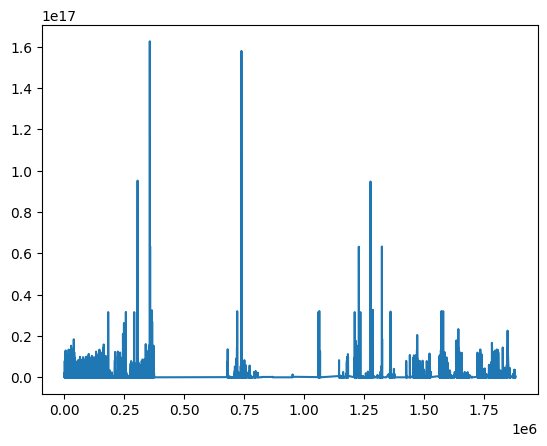

In [22]:
# plotting the values for visualization
fires_df["days_burning"].plot()

<Axes: xlabel='days_burning'>

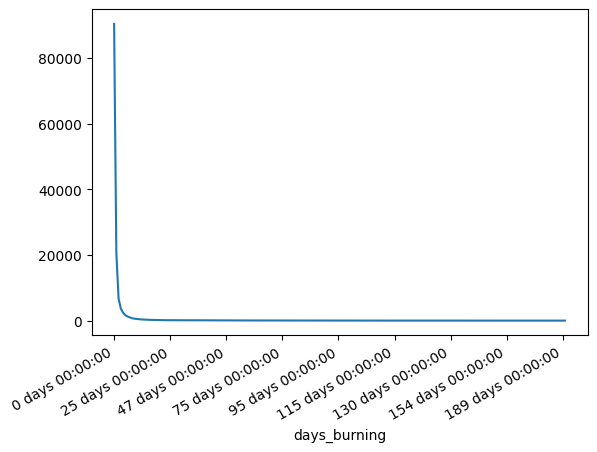

In [23]:
# Plotting the value counts of the days burning
fires_df["days_burning"].value_counts().plot()

##### The statistical summary of the `days_burning` column shows that most of the fires are contained within the very day. Similar trend moves forward towards 1 day, 2 days and so on.

##### The max value is 1881 days which is more than 5 years and it is unrealistic. Similarly, there are other similar values like 1827, 1101, 1096 days. There seems to be an inaccuracy with the dataset.

####
####

#### Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?

In [24]:
# Finding the records over 100 acres
days_burning_over_100_acres = fires_df.query("acres_burned > 100")[["acres_burned","days_burning"]]

days_burning_over_100_acres

,acres_burned,days_burning
16,16823.0,15 days
17,7700.0,4 days
39,125.0,1 days
116,119.0,1 days
117,119.0,0 days
...,...,...
1879778,195.0,3 days
1879800,2264.0,12 days
1879825,157.0,0 days
1880293,480.0,2 days


In [25]:
# counting the values
days_burning_over_100_acres.value_counts()

acres_burned  days_burning
200.0         0 days          492
150.0         0 days          466
120.0         0 days          401
300.0         0 days          296
160.0         0 days          278
                             ... 
681.0         2 days            1
              43 days           1
              76 days           1
682.0         0 days            1
606945.0      76 days           1
Name: count, Length: 15301, dtype: int64

In [26]:
# displaying the sorted values with days_burning
days_burning_over_100_acres.sort_values(by="days_burning",ascending=False)

,acres_burned,days_burning
356156,120.0,1881 days
357487,900.0,735 days
1324066,158.0,732 days
1227849,250.0,731 days
1572579,17944.0,371 days
...,...,...
782266,160.0,0 days
782270,120.0,0 days
782275,250.0,0 days
782277,790.0,0 days


<Axes: xlabel='acres_burned', ylabel='days_burning'>

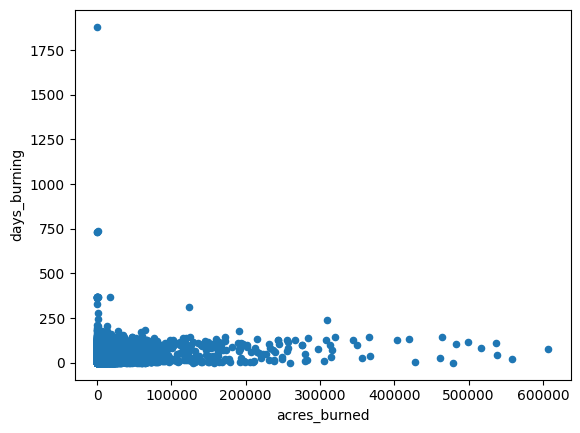

In [27]:
# Converting the days into integer
days_burning_over_100_acres["days_burning"] = days_burning_over_100_acres["days_burning"].dt.days

# Plotting the scatterplot to visualize the outliers
days_burning_over_100_acres.plot.scatter(x="acres_burned", y ="days_burning" )

##### On exploring the number of days burning and the acres burned, we can see that the dataset contains the outliers in both directions. There are unrealistically high numbers in `acres_burned` as well as `days_burning`. Therefore, we've got to handle the outliers  before proceeding with any further analysis as they affect the analysis in an adverse way.